# Import libraries

In [2]:
# Importing the libraries
import pandas as pd
#pandas is a library it contains functions of the database
import numpy as np
#numpy used to # Statistical analysis # Random numbers # Creating arrays(Matrix multiplication) 
import matplotlib.pyplot as plt
# matplotlib used to #data visualization 


In [3]:
#data variablecsv valus is stored
data = pd.read_csv('Salary_Data.csv')

In [4]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
# Get column names
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
# Check data types of columns
print(data.dtypes)

YearsExperience    float64
Salary             float64
dtype: object


In [7]:
x = data[["YearsExperience"]] #Indepedent Variable(input variable,feature),years of Experience, datatype float
y = data[["Salary"]] # Depedent Variable(response/target/output variable,lable), Salary, datatype float

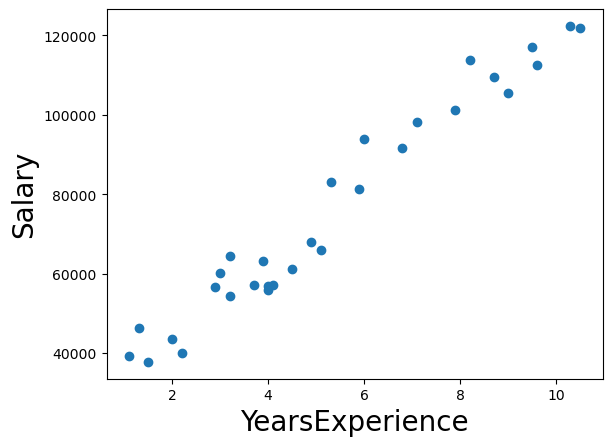

In [8]:
plt.scatter(x,y)  #x=independent,y=dependent
plt.xlabel('YearsExperience',fontsize=20) #input showing as X axis #text font size 20
plt.ylabel('Salary',fontsize=20) #target showing as Y axis
plt.show()  # daya visualization chart of linear regression y=wx+b

In [9]:
#to import the train_test_split function from the sklearn.model_selection module in the Scikit-learn library. 
#This function is commonly used to split a dataset into training and testing(split) subsets.
#from means only few module/algorithm taken 
#sklearn.model_selection   here . dot means within folder
#import mean takes all
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
#random_state (1,0, 42, etc.) doesn't matter much; it’s just a seed and same result on multi runs
#if random_state is not set #run your ml code multiple times, you may see different data points of training and test sets

In [ ]:
#1#X_train is training features (input data)  (varaiable name shouldbe_)
#2#X_test is to evaluate the model's performance(input data)    
#3#y_train is training target (output/labels) 
#4#y_test is testing target(output)
#varaiable name any, but order follows same 1,2,3,4
#test_size =30% of test data
# after split we are ready to model creation

In [10]:
y_test
#Actual Output

,Salary
2,37731.0
28,122391.0
13,57081.0
10,63218.0
26,116969.0
24,109431.0
27,112635.0
11,55794.0
17,83088.0


In [11]:
# Train a model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)#y=W*x1+b0 for this equation we got value for b1 and bo
#.fit is used to model creation


LinearRegression()

In [12]:
#checking weight and Bias
# Viewing the b1 and bo value
weight=regressor.coef_
print("Weight of the model={}".format(weight))
bais=regressor.intercept_
print("Intercept of the model={}".format(bais))

Weight of the model=[[9360.26128619]]
Intercept of the model=[26777.3913412]


In [ ]:
#now we are ready to testset(y_pred) #predict of Xtest , after model creation

In [13]:
y_pred=regressor.predict(X_test)

In [14]:
y_pred

array([[ 40817.78327049],
       [123188.08258899],
       [ 65154.46261459],
       [ 63282.41035735],
       [115699.87356004],
       [108211.66453108],
       [116635.89968866],
       [ 64218.43648597],
       [ 76386.77615802]])

In [ ]:
#after y_pred , ready to EM

In [ ]:
#R square=ssr(high error)/sst(low error)

In [15]:
#Evaluation Metric
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
#y_test-Actual Output
#y_pred predected output

In [16]:
r_score

0.9740993407213511

In [ ]:
#after cross check EM, save the best model

In [17]:
#save the best model
import pickle
filename = 'finalized_model.sav'
pickle.dump(regressor, open(filename, 'wb'))
#.sav file auto saved once its executed in same folder of .ipynb file location
#wr -write binary

In [ ]:
#once .sav file generated, load model and predit using input and provide result as phase2

In [18]:
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))  #read binary-rb
result = loaded_model.predict([[15]])
print(result)

[[167181.3106341]]


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#ignore warnings
# modelprediction end user dynamic input value as bellow (optional)

In [19]:
prediction_input=int(input("Enter the Prediction input value:"))
#dynmaic enter value

Enter the Prediction input value:0


In [20]:
Future_Prediction=regressor.predict([[prediction_input]])
print("Future_Prediction={}".format(Future_Prediction))

Future_Prediction=[[26777.3913412]]


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#bias =orgin= if 0 experice employee salary equals to bias by defult.
#next step we can deployment seperate file  as  import pickle (best model) and pridict using input and provide result